<a href="https://colab.research.google.com/github/worldofaryavart/colab_notebooks/blob/colabnotebook/Workinoncsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

np.set_printoptions(precision = 3, suppress = True)

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
             "Viscera weight", "Shell weight", "Age"]
)
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [ ]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')
abalone_labels

0        7
1        6
2       14
3       16
4       13
        ..
3315    15
3316    10
3317    11
3318    16
3319    19
Name: Age, Length: 3320, dtype: int64

In [ ]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [ ]:
abalone_model = tf.keras.Sequential([
    layers.Dense(64,activation = 'relu'),
    layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [ ]:
abalone_model.fit(abalone_features, abalone_labels, epochs = 10)

Epoch 1/10
104/104 [==============================] - 3s 3ms/step - loss: 70.7659
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 15.6181
Epoch 3/10
104/104 [==============================] - 0s 4ms/step - loss: 8.6040
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 8.0501
Epoch 5/10
104/104 [==============================] - 0s 3ms/step - loss: 7.5368
Epoch 6/10
104/104 [==============================] - 0s 4ms/step - loss: 7.1292
Epoch 7/10
104/104 [==============================] - 0s 4ms/step - loss: 6.7674
Epoch 8/10
104/104 [==============================] - 0s 3ms/step - loss: 6.5578
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 6.3971
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 6.2697


In [ ]:
normalize = layers.Normalization()

In [ ]:
normalize.adapt(abalone_features)

In [ ]:
norm_abalone_model = tf.keras.Sequential([
    normalize,
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 2s 2ms/step - loss: 86.1693
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 42.9807
Epoch 3/10
104/104 [==============================] - 0s 3ms/step - loss: 29.1863
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 20.4437
Epoch 5/10
104/104 [==============================] - 0s 3ms/step - loss: 12.2185
Epoch 6/10
104/104 [==============================] - 0s 3ms/step - loss: 7.8301
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 6.5344
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 6.0837
Epoch 9/10
104/104 [==============================] - 0s 3ms/step - loss: 5.8067
Epoch 10/10
104/104 [==============================] - 0s 3ms/step - loss: 5.5555


# Titanic csv model train


In [ ]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [ ]:
input = tf.keras.Input(shape = (), dtype = tf.float32)
result = 2*input+1
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [ ]:
input

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'input_1')>

In [ ]:
calc = tf.keras.Model(inputs = input, outputs = result)

In [ ]:
print(calc(np.array([1])).numpy())
print(calc(np.array([2])).numpy())

[3.]
[5.]


In [ ]:
inputs = {}
for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name= name, dtype = dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [ ]:
numeric_inputs = {name: input for name,input in inputs.items()
                  if input.dtype == tf.float32}
x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

In [ ]:
preprocessed_inputs = [all_numeric_inputs]

In [ ]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens = lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

TypeError: Exception encountered when calling layer "concatenate_3" (type Concatenate).

Tensors in list passed to 'values' of 'ConcatV2' Op have types [float32, float32, float32, float32, float32, float32, int64, int64, int64, int64, int64] that don't all match.

Call arguments received by layer "concatenate_3" (type Concatenate):
  • inputs=['tf.Tensor(shape=(None, 4), dtype=float32)', 'tf.Tensor(shape=(None, 3), dtype=float32)', 'tf.Tensor(shape=(None, 4), dtype=float32)', 'tf.Tensor(shape=(None, 9), dtype=float32)', 'tf.Tensor(shape=(None, 5), dtype=float32)', 'tf.Tensor(shape=(None, 3), dtype=float32)', 'tf.Tensor(shape=(None, None), dtype=int64)', 'tf.Tensor(shape=(None, None), dtype=int64)', 'tf.Tensor(shape=(None, None), dtype=int64)', 'tf.Tensor(shape=(None, None), dtype=int64)', 'tf.Tensor(shape=(None, None), dtype=int64)']

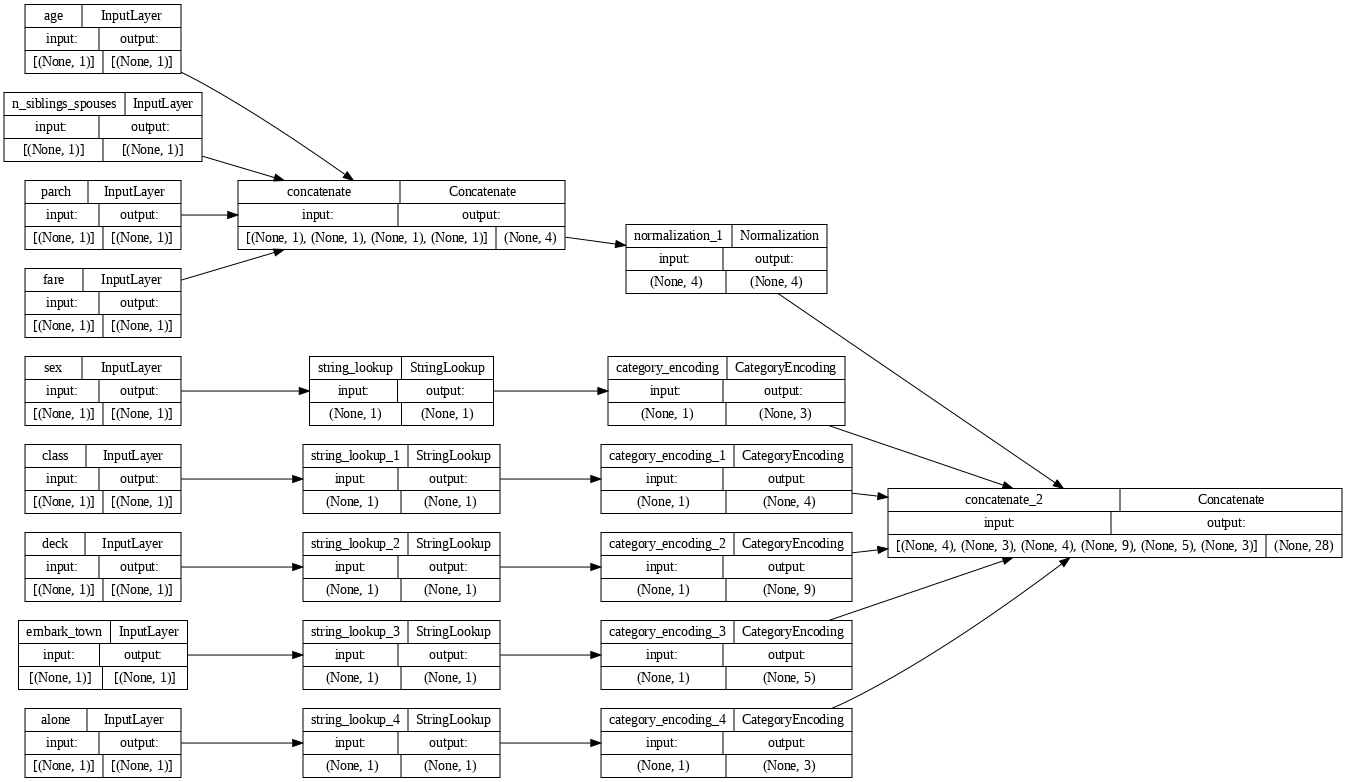

In [ ]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inuts)
titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)
tf.keras.utils.plot_model(model = titanic_preprocessing, rankdir = "LR", dpi = 72, show_shapes = True)

In [ ]:
titanic_features_dict = {name: np.array(value)
                        for name, value in titanic_features.items()}

In [ ]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [ ]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
                optimizer = tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [ ]:
titanic_model.fit(x = titanic_features_dict, y = titanic_labels, epochs = 10)

Epoch 1/10
20/20 [==============================] - 2s 6ms/step - loss: 0.6724
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5950
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5458
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5099
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4799
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4587
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4400
Epoch 8/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4289
Epoch 9/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4191
Epoch 10/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4136


In [ ]:
titanic_model.save('test.keras')
reloaded = tf.keras.models.load_model('test.keras')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()